In [126]:
#We need to register MJD of each excel file we ingest
#Each injest needs to be indentifiable with the MJD.

#Test single plots only.

import matplotlib.pyplot as plt
import glob
import astropy
import importlib
import math
import numpy as np
import xlwt
import xlsxwriter
import warnings
warnings.filterwarnings('ignore')

from xlwt import Workbook
from reduct_funcs import funcs_calib_and_plot
from reduct_funcs import funcs_star_finder
from reduct_funcs import funcs_apt_phot
from reduct_funcs import funcs_utils
from reduct_funcs import funcs_polarimetry

importlib.reload(funcs_calib_and_plot)
importlib.reload(funcs_star_finder)
importlib.reload(funcs_apt_phot)
importlib.reload(funcs_utils)
importlib.reload(funcs_polarimetry)

#This notebook plots the polarization data that we worked so hard to get.

<module 'reduct_funcs.funcs_polarimetry' from 'C:\\Users\\afiq-Astro\\Desktop\\TSSP\\reductions_4\\reduct_funcs\\funcs_polarimetry.py'>

In [82]:
#Defend pop punk! yeah
#initiate utils to merge two scpripts
#So there is an imbalance between the excels
#But the plan is just to combine them line by fugging line
#starting with the 0+1 line (where the data are)

#This little part right here combines scripts. I somewhat don't trust the output. It is prone to name
#convention errors

#Params
MJD = '2020-04-18'
targ_f_name = 'EE Cet'
p1_strt = 0
p1_end = 50

p3_strt = 50
p3_end = 100

pol_filt = 'R'

p1_filename=MJD+'_'+targ_f_name+'_P1-'+pol_filt+str(p1_strt)+'-'+str(p1_end)+'.xlsx'
p3_filename=MJD+'_'+targ_f_name+'_P3-'+pol_filt+str(p3_strt)+'-'+str(p3_end)+'.xlsx'

p1R_script = './stats/'+MJD+'/target/EE_Cep/' + p1_filename
p3R_script = './stats/'+MJD+'/target/EE_Cep/' + p3_filename
sv_out = './stats/'+MJD+'/target/EE_Cep/'

funcs_utils.combine_excels(p1R_script,  p3R_script, sv_out, MJD, targ_f_name, "R", p1_strt, p3_end)

Sheet 1: ./stats/2020-04-18/target/EE_Cep/2020-04-18_EE Cet_P1-R0-50.xlsx
Sheet 2: ./stats/2020-04-18/target/EE_Cep/2020-04-18_EE Cet_P3-R50-100.xlsx
output: ./stats/2020-04-18/target/EE_Cep/master_2020-04-18_EE Cet_P1-P3R0-100_mac_comb.xlsx


In [48]:
(target_data, zero_pol_data, high_pol_data)= funcs_utils.data_loader()

print(len(target_data) , "targets")
print(len(zero_pol_data) , "zero pols")
print(len(high_pol_data) , "high pols")

Load all excel data
16 targets
14 zero pols
22 high pols


In [28]:
data_strs = ['cep', 'Cep']
filtered_data = funcs_utils.filter_data(target_data, data_strs)

Returned 16 results


In [68]:
data_strs = ['215806']
filtered_data = funcs_utils.filter_data(high_pol_data, data_strs)

Returned 10 results


Function that takes in a dataset and a calibration points and subtracts the data


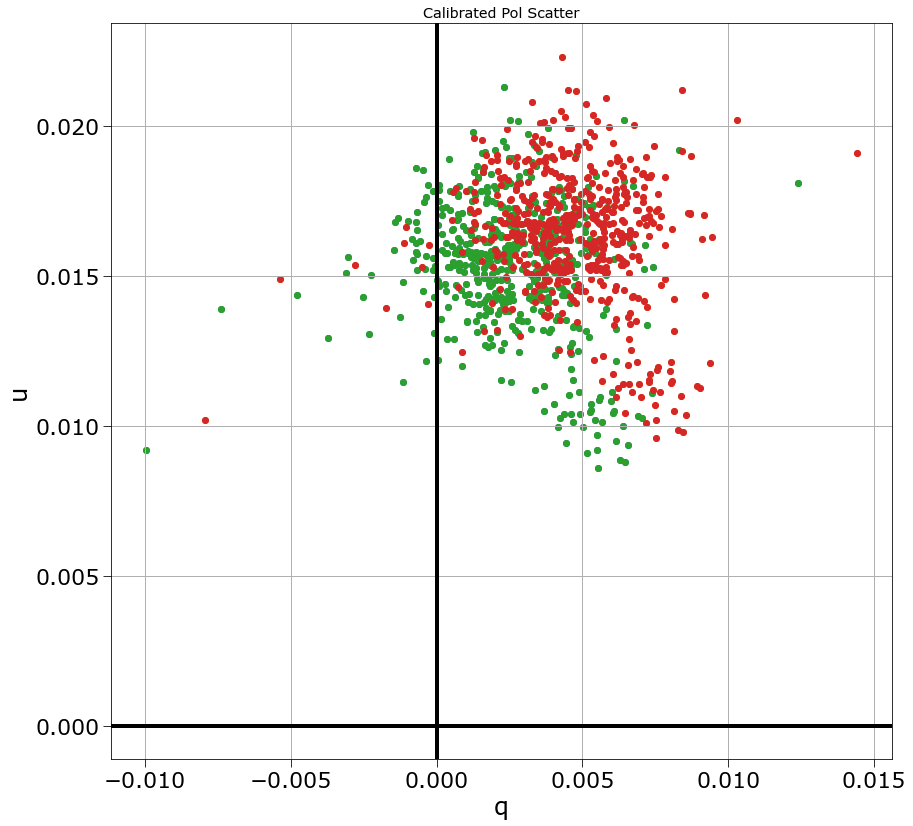

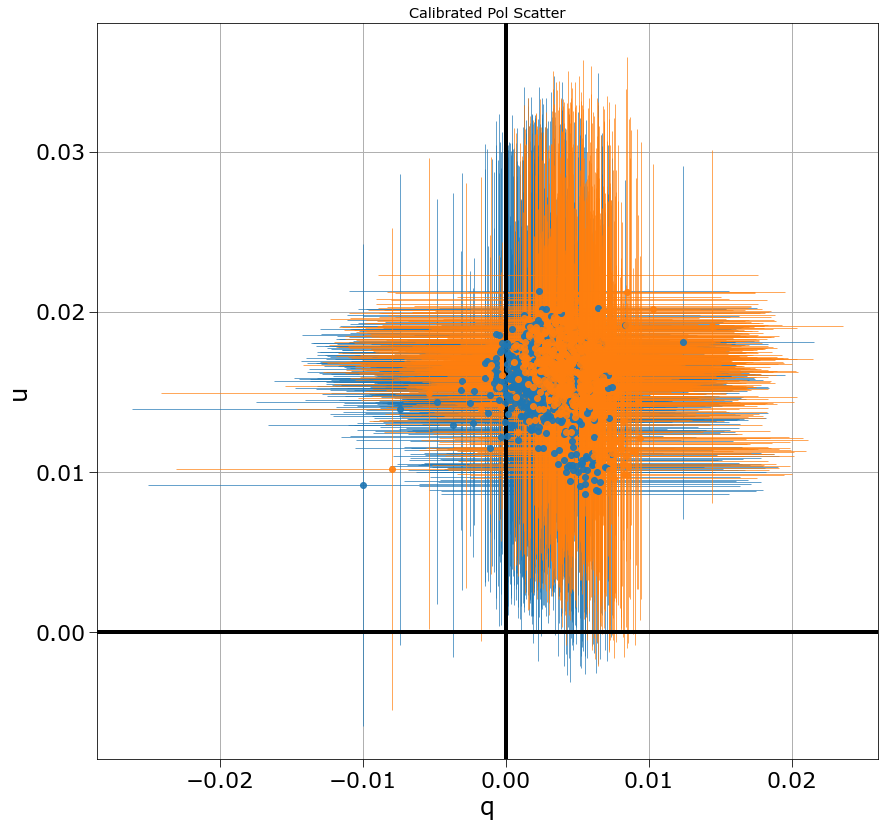

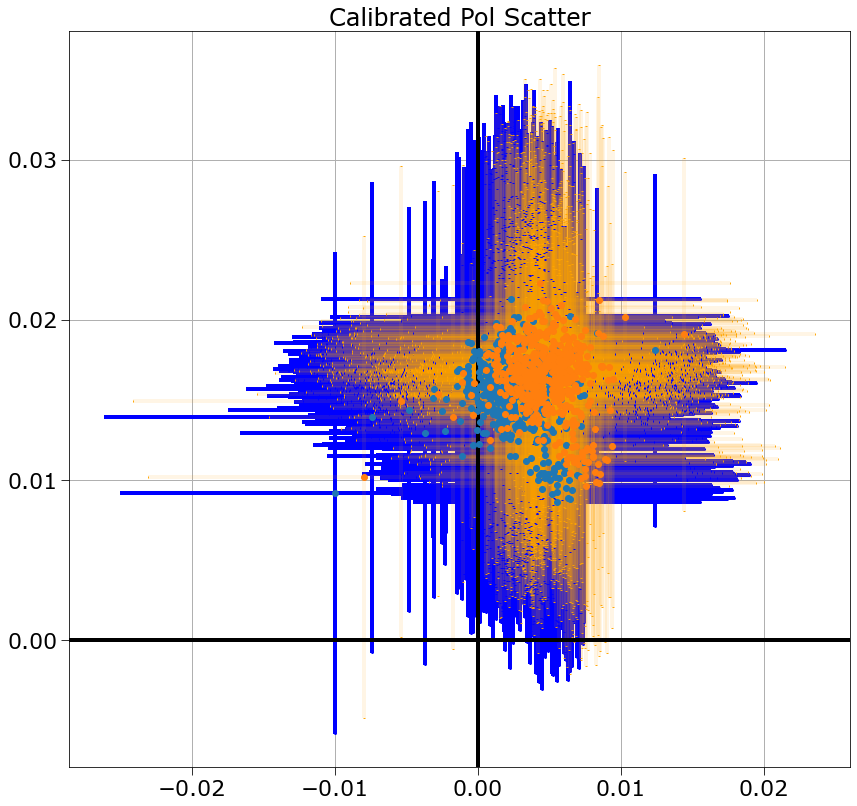

In [100]:
funcs_polarimetry.calib_data(filtered_data, (-0.002, 0.001 ,-0.001 , 0.001), False)

Function that takes in a dataset and a calibration points and subtracts the data


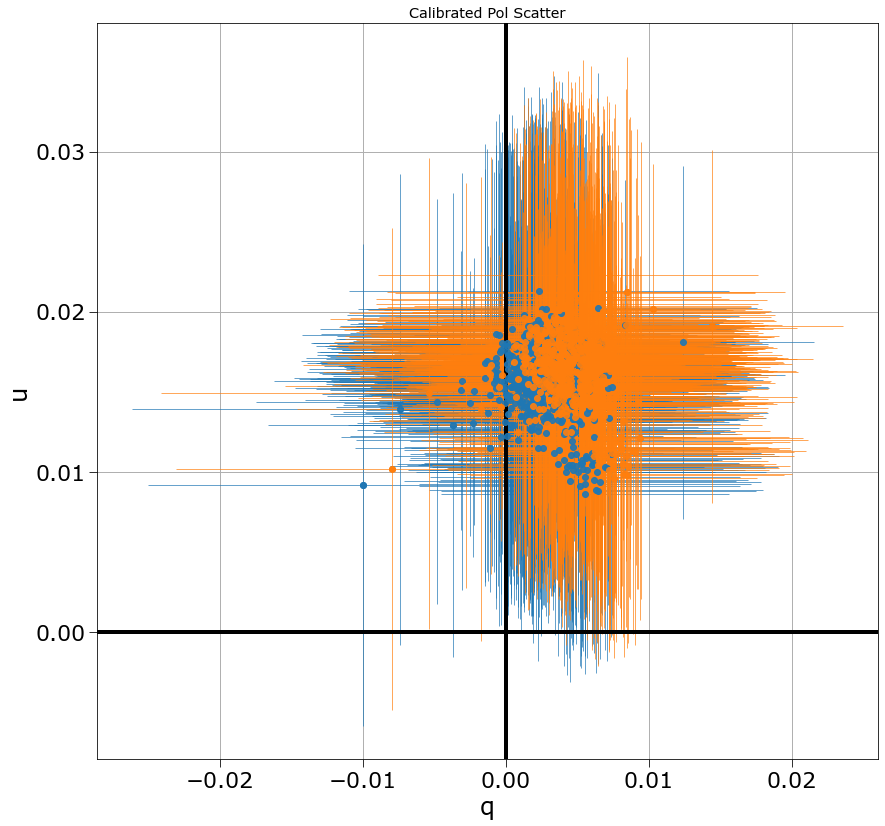

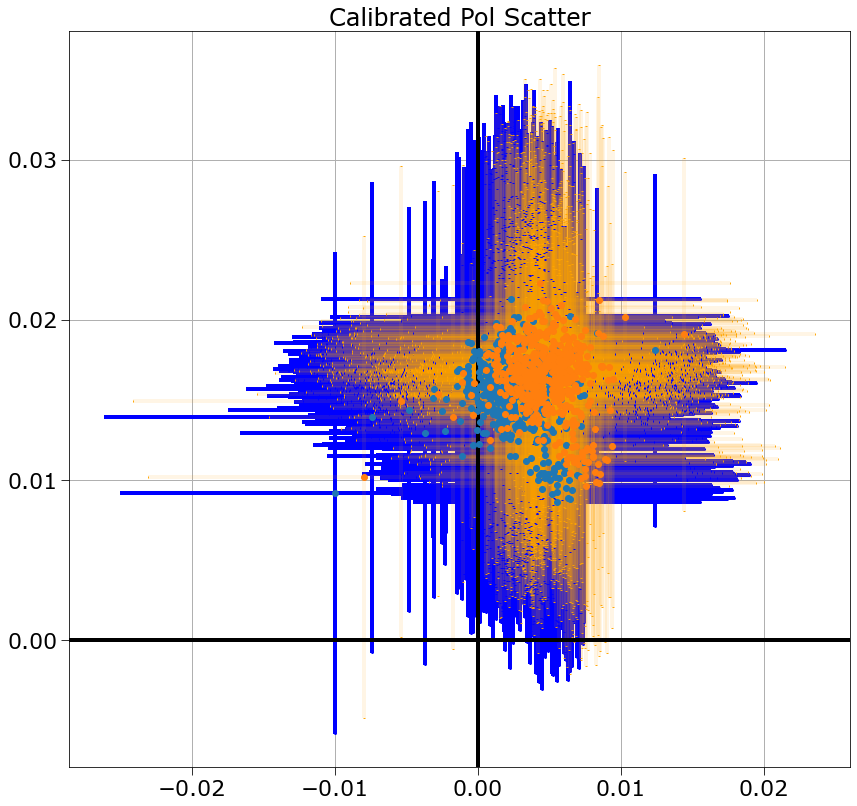

In [96]:
funcs_polarimetry.calib_data(filtered_data, (-0.002, 0.001 ,-0.001 , 0.001), False)

In [ ]:
#you will have an artefact called "calibrated data" and you will feed these to the same plot tools

In [75]:
data_strs = ['EE', 'ee']
filtered_data = funcs_utils.filter_data(target_data, data_strs)

Returned 16 results


Plot q or u stability
eecep 2020-03-05
Pol PA!!! -21.36647208777469 ± -21.36647208777469
EE Cep 2020-03-14
Pol PA!!! -25.81289685116384 ± -25.81289685116384
EE Cep 2020-03-15
Pol PA!!! -17.180848360874872 ± -17.180848360874872
eecep 2020-03-24
Pol PA!!! -20.720677139904215 ± -20.720677139904215
eecep 2020-03-25
Pol PA!!! -23.72284168187189 ± -23.72284168187189
eecep 2020-03-26
Pol PA!!! -19.473740446931036 ± -19.473740446931036
eecep 2020-03-31
Pol PA!!! -17.764663589349013 ± -17.764663589349013
EE_Cep 2020-04-01
Pol PA!!! -20.35097313605086 ± -20.35097313605086
EE Cep 2020-04-04
Pol PA!!! -19.987001752279244 ± -19.987001752279244
EE Cep 2020-04-05
Pol PA!!! -12.096928436615404 ± -12.096928436615404
eecep 2020-04-06
Pol PA!!! -19.3977558924097 ± -19.3977558924097
eecep 2020-04-07
Pol PA!!! -17.50062104439179 ± -17.50062104439179
eecep 2020-04-08
Pol PA!!! -17.88075850603981 ± -17.88075850603981
eecep 2020-04-15
Pol PA!!! -16.584326491705866 ± -16.584326491705866
eecep 2020-04-16
Pol PA

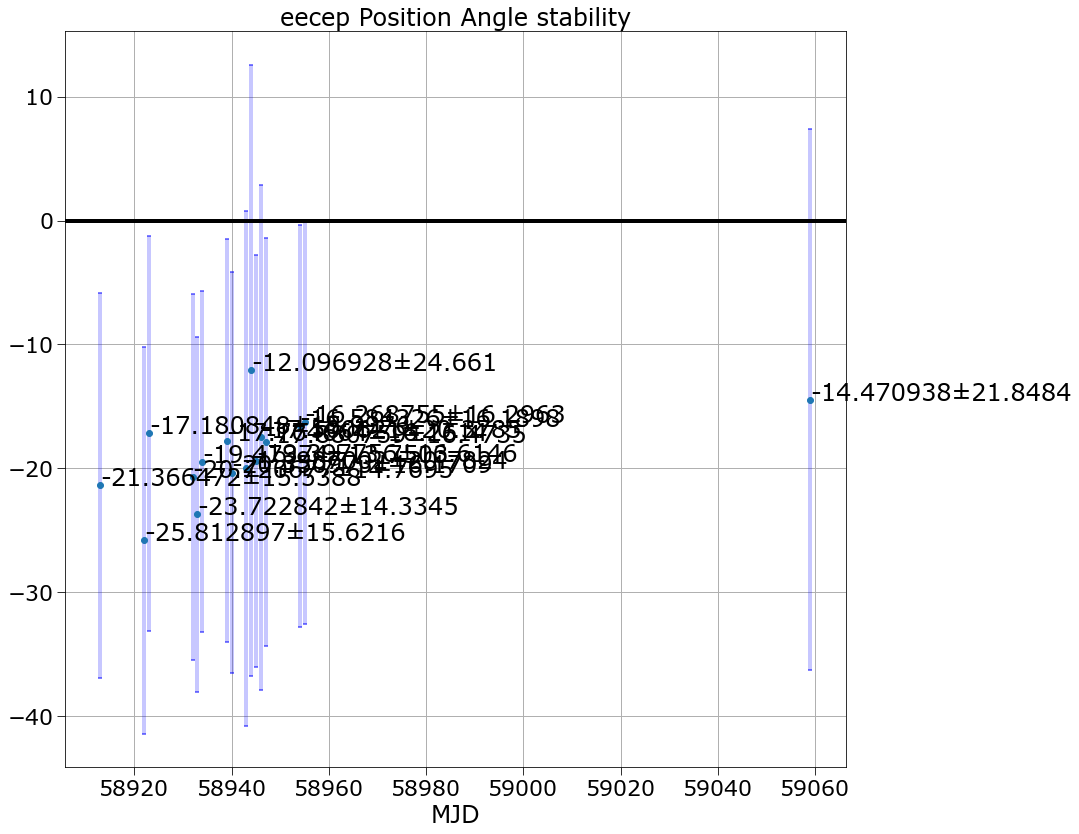

In [79]:
funcs_polarimetry.plot_PA_stability(filtered_data , 'degree', True,False, True,'./img_out/stability/EE Cephei_PD_stab')

Plot q or u stability
eecep 2020-03-05
Pol D!!! 1.9376871187993396 ± 1.0495075627288395
EE Cep 2020-03-14
Pol D!!! 2.5416971466093607 ± 1.3908883989460634
EE Cep 2020-03-15
Pol D!!! 2.1892426547374204 ± 1.207598225786583
eecep 2020-03-24
Pol D!!! 1.998101029512071 ± 1.0021287458642818
eecep 2020-03-25
Pol D!!! 1.9714352114985911 ± 0.9866691353131172
eecep 2020-03-26
Pol D!!! 2.203232538597508 ± 1.0068786132012904
eecep 2020-03-31
Pol D!!! 1.7796969069929687 ± 0.9320975562985112
EE_Cep 2020-04-01
Pol D!!! 2.1881095396417862 ± 1.1927065615402246
EE Cep 2020-04-04
Pol D!!! 1.8262432571096807 ± 1.3227399037070495
EE Cep 2020-04-05
Pol D!!! 1.4382947303629676 ± 1.0406312855349253
eecep 2020-04-06
Pol D!!! 2.0204281847921366 ± 1.1155571724633058
eecep 2020-04-07
Pol D!!! 1.736554689114246 ± 1.2327583449081945
eecep 2020-04-08
Pol D!!! 1.8374585931709615 ± 1.0541884159645956
eecep 2020-04-15
Pol D!!! 1.9050728804074955 ± 0.974709242898
eecep 2020-04-16
Pol D!!! 1.936301657687615 ± 1.104074998

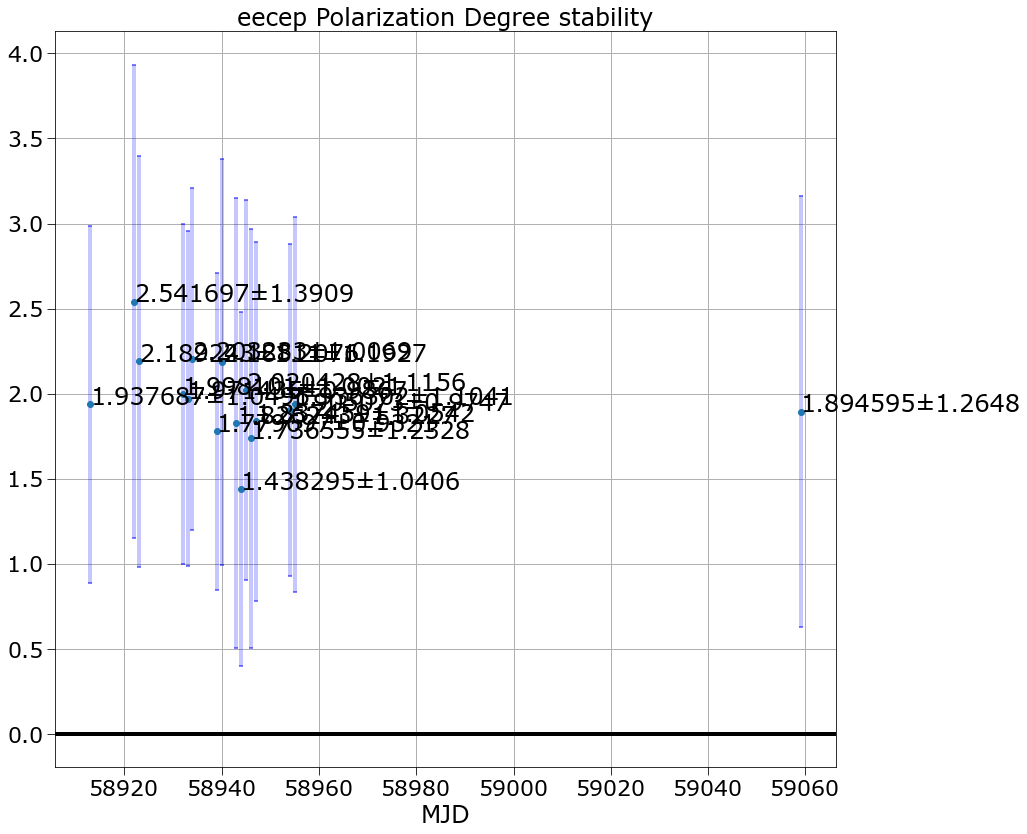

In [80]:
funcs_polarimetry.plot_PD_stability(filtered_data , 'perc', True,False, True,'./img_out/stability/EE Cephei_PD_stab')

Plot q or u stability
g191b2b 2020-03-05
Pol D!!! 0.17625837230344496 ± 1.2439730208195456
G191B2B 2020-03-14
Pol D!!! 0.23343664910962375 ± 1.2208911538853018
G191B2B 2020-03-15
Pol D!!! 0.39302009073472477 ± 1.3097344409985432
hd212311 2020-03-25
Pol D!!! 0.9690651512313118 ± 0.8450788922952113
g191b2b 2020-03-26
Pol D!!! 0.18059584337319362 ± 1.3604099621026124
hd212311 2020-03-26
Pol D!!! 0.9084403140767854 ± 1.0328916732535631
hd212311 2020-03-31
Pol D!!! 0.6697332938719521 ± 0.9118857364304249
hd212311 2020-04-06
Pol D!!! 0.9734798967716639 ± 0.8970421846384518
hd212311 2020-04-07
Pol D!!! 0.862328660927094 ± 1.1952084557893585
hd212311 2020-04-08
Pol D!!! 0.8690929522815886 ± 0.9636950462913287
hd212311 2020-04-15
Pol D!!! 0.8308176001898865 ± 0.8908383572282342
g191b2b 2020-04-16
Pol D!!! 0.2987770247875986 ± 1.1834973100629762
hd212311 2020-04-16
Pol D!!! 0.8722874023178192 ± 1.1139844793159526
hd212311 2020-07-29
Pol D!!! 0.8825571732419089 ± 1.03947831512363


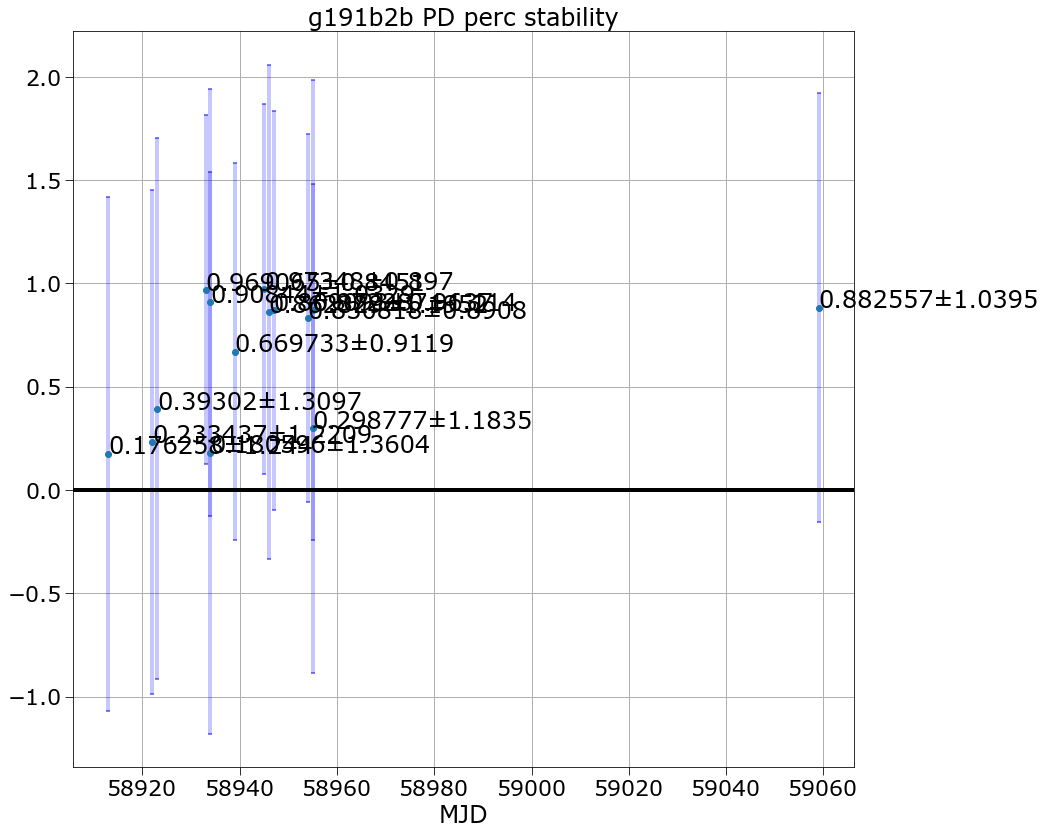

In [58]:
funcs_polarimetry.plot_PD_stability(zero_pol_data, 'perc', True,False, True,'./img_out/stability/EE Cephei_PD_stab')

N obs: 16


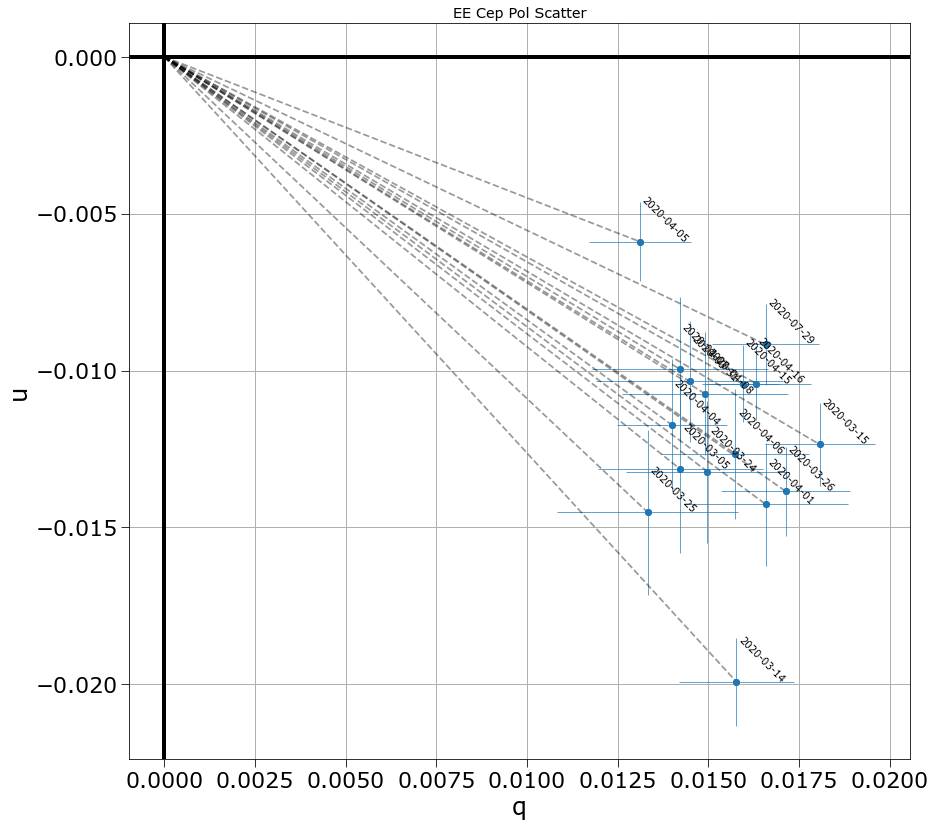

Plot q or u stability


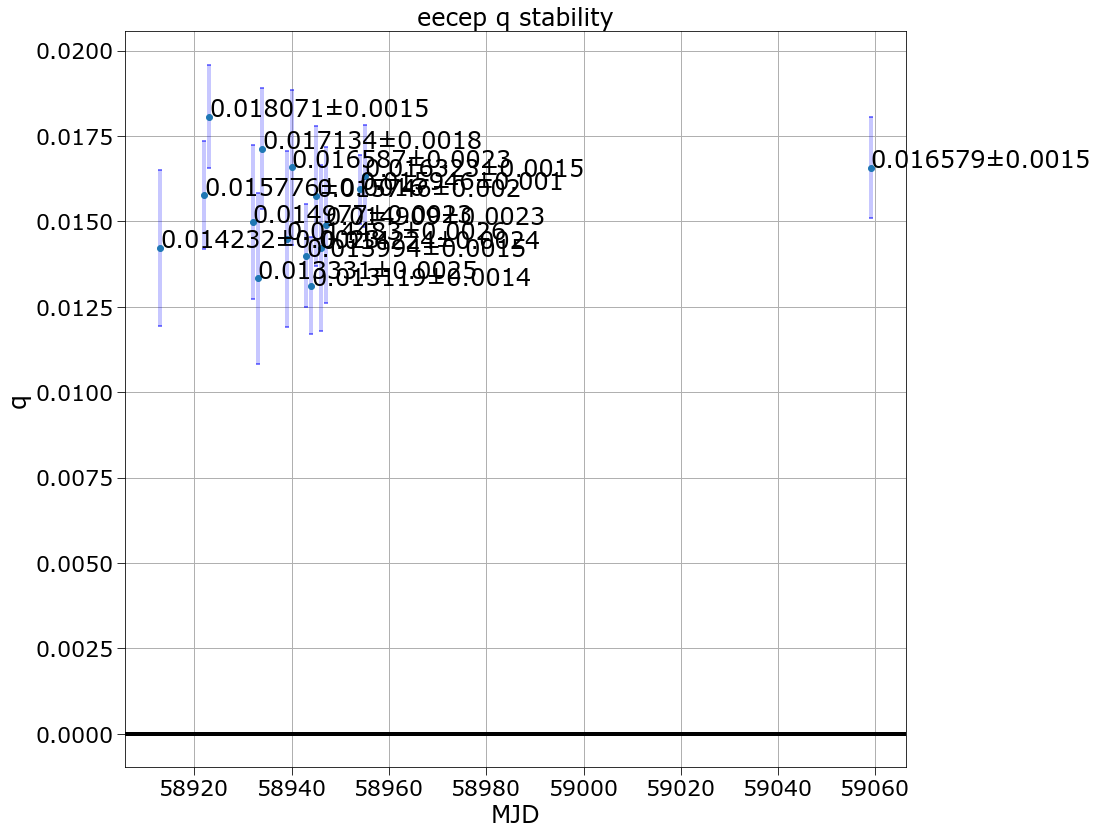

Plot q or u stability


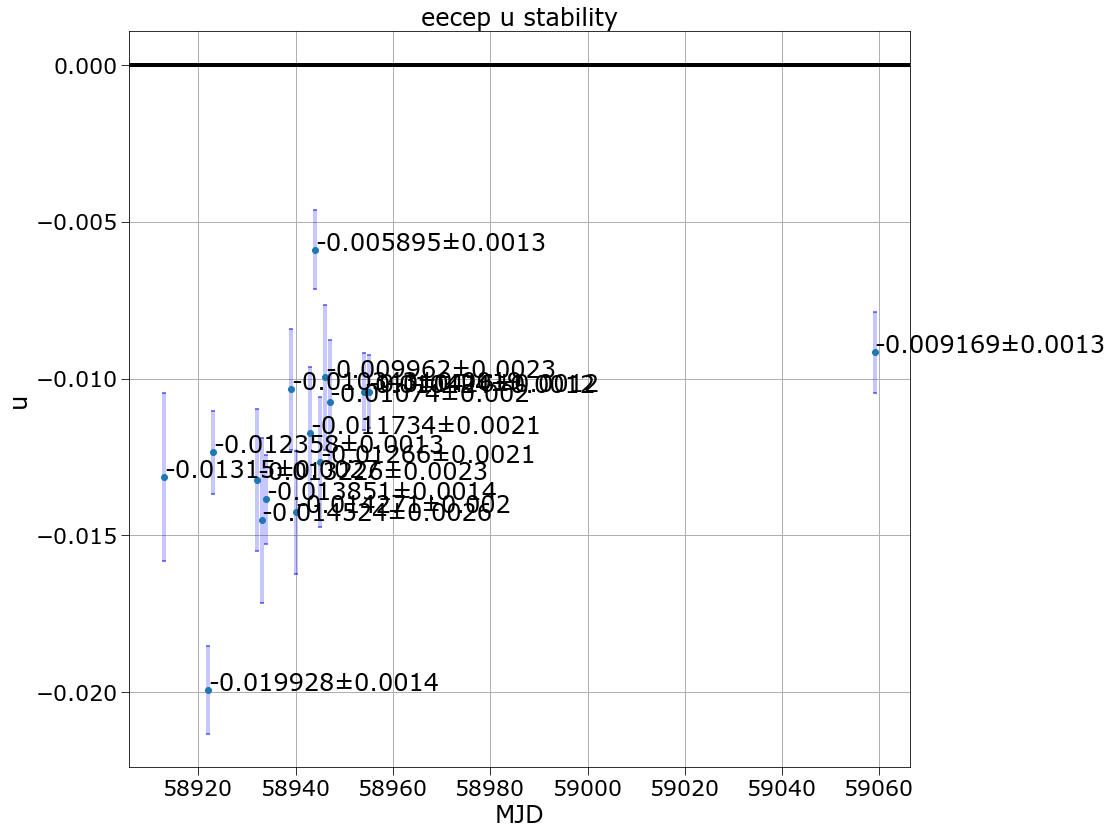

In [39]:
funcs_polarimetry.q_n_u_single_plot_v1(filtered_data, 'pink', './img_out/'+['EE Cep'][0], False , True, True,True, './img_out/stability/target_q_n_u')
funcs_polarimetry.plot_q_u_stability(filtered_data, 'q', True,False, False, './img_out/stability/EE Cephei_q_stab')
funcs_polarimetry.plot_q_u_stability(filtered_data, 'u', True,False, False,'./img_out/stability/EE Cephei_u_stab')

In [89]:
data_strs = ['g191b2b', 'G191B2B']
filtered_data = funcs_utils.filter_data(zero_pol_data, data_strs)

Returned 5 results


In [ ]:
funcs_polarimetry.q_n_u_single_plot_v1(filtered_data, 'pink', './img_out/HD '+['G191B2B'][0], False , True, True,True, './img_out/stability/zero_pol_q_u_b')

Plot q or u stability
2020-03-05_g191b2b 2020-03-05T00:00:00.000 58913.0
2020-03-14_G191B2B 2020-03-14T00:00:00.000 58922.0
2020-03-15_G191B2B 2020-03-15T00:00:00.000 58923.0
2020-03-26_g191b2b 2020-03-26T00:00:00.000 58934.0
2020-04-16_g191b2b 2020-04-16T00:00:00.000 58955.0


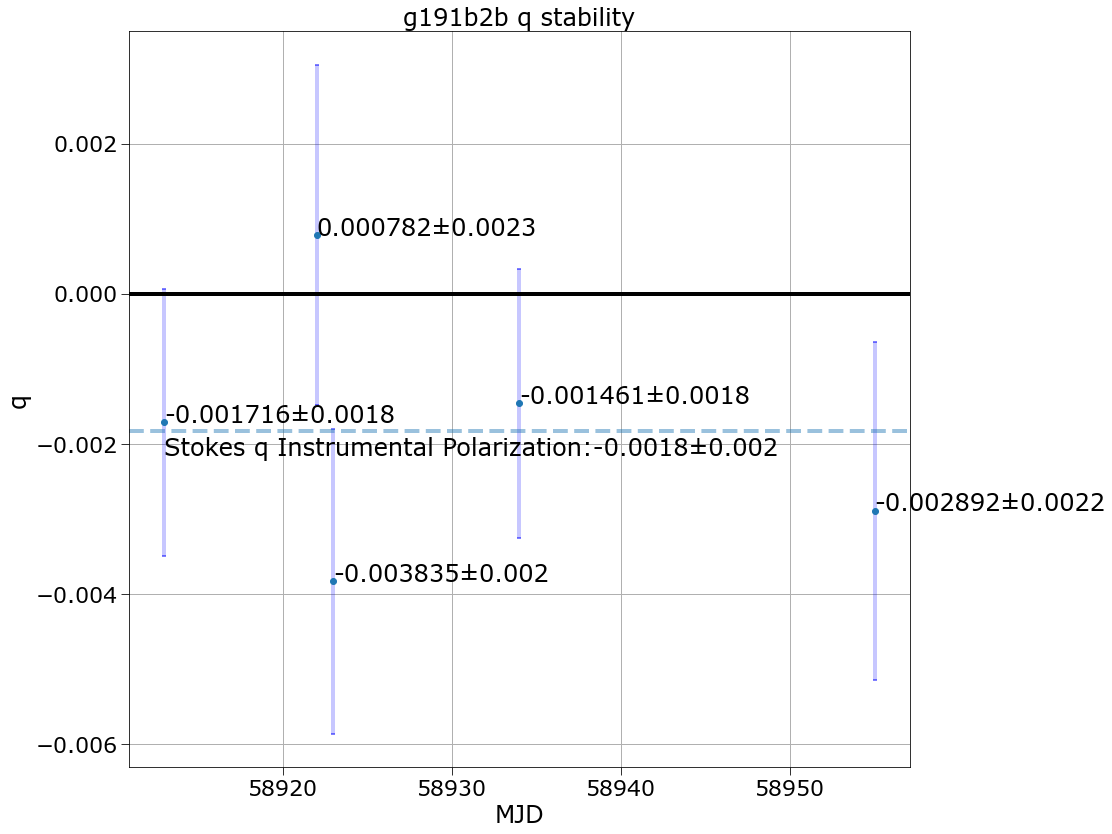

Plot q or u stability
2020-03-05_g191b2b 2020-03-05T00:00:00.000 58913.0
2020-03-14_G191B2B 2020-03-14T00:00:00.000 58922.0
2020-03-15_G191B2B 2020-03-15T00:00:00.000 58923.0
2020-03-26_g191b2b 2020-03-26T00:00:00.000 58934.0
2020-04-16_g191b2b 2020-04-16T00:00:00.000 58955.0


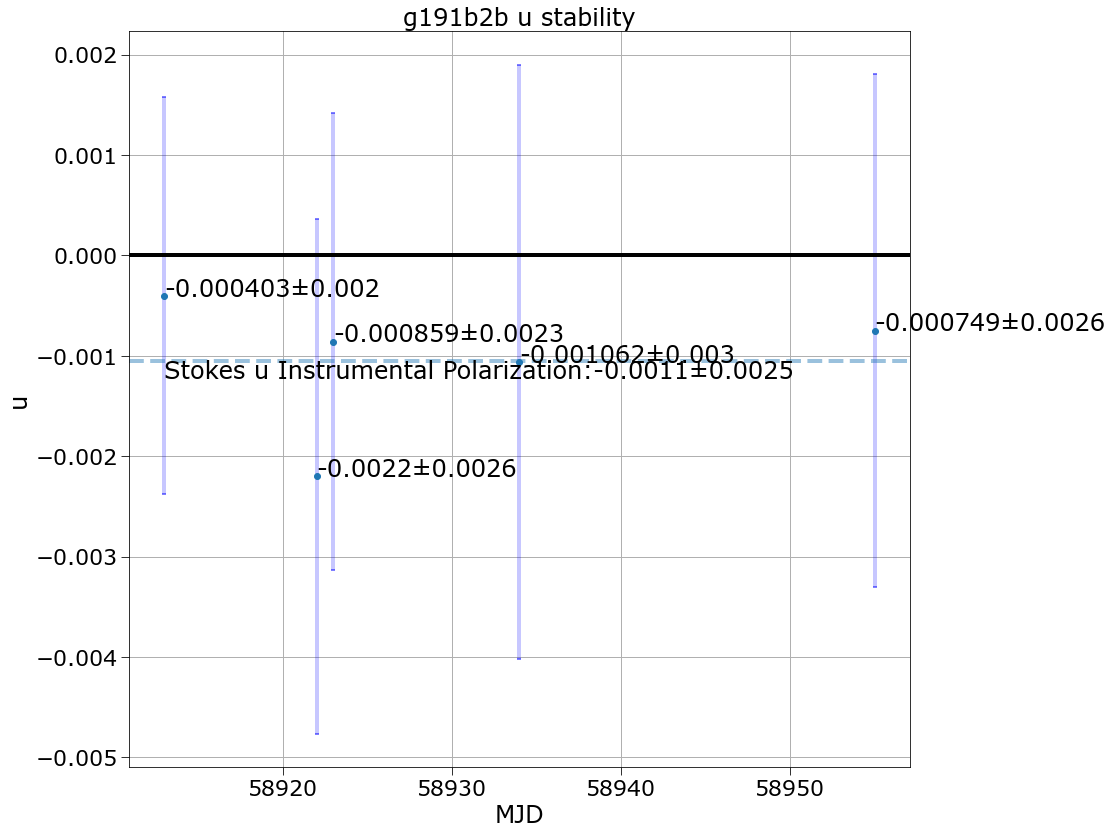

In [127]:
funcs_polarimetry.plot_q_u_stability(filtered_data, 'q', True,True, False,'./img_out/stability/G191B2B_q_stab')
funcs_polarimetry.plot_q_u_stability(filtered_data, 'u', True,True, False,'./img_out/stability/G191B2B_u_stab')

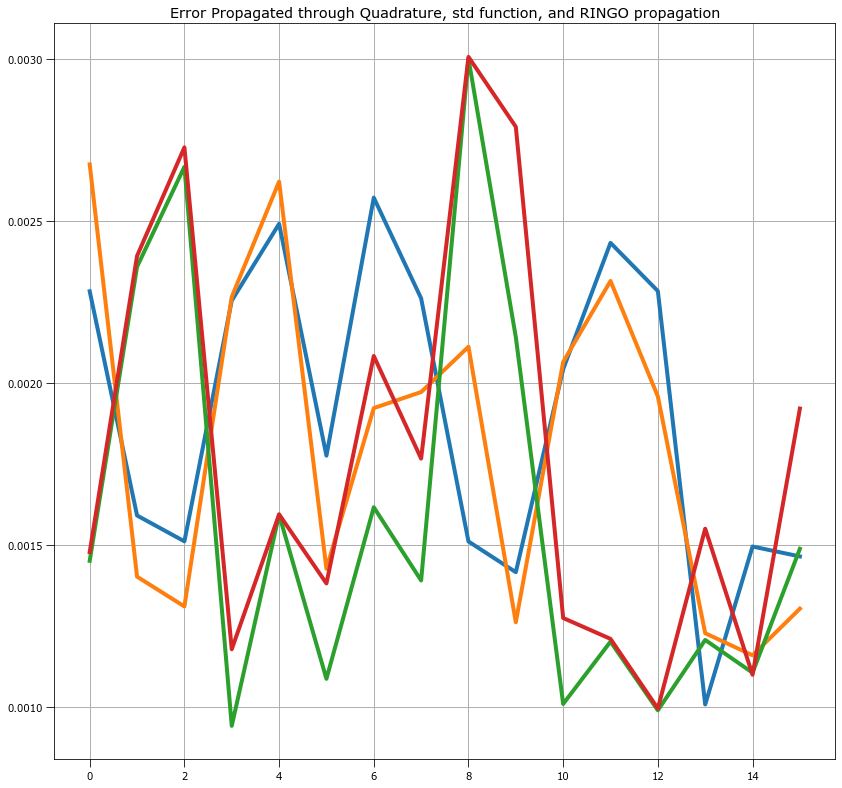

In [102]:
#An experiment to test q and u standard error
#these deals with error
#Based on this we can see that std and RINGO are the way to go.

q_quadrature_combs = []
u_quadrature_combs = []
q_ringo_combs = []
u_ringo_combs = []
q_stds = []
u_stds = []

for numb in range(0, len(target_data)):
    q_quadrature_combs.append(funcs_utils.my_quadrature_compute(target_data[numb][list(target_data[numb].keys())[0]][1][1:]))
    u_quadrature_combs.append(funcs_utils.my_quadrature_compute(target_data[numb][list(target_data[numb].keys())[0]][3][1:]))
    
    q_stds.append(np.std(target_data[numb][list(target_data[numb].keys())[0]][0][1:]))
    u_stds.append(np.std(target_data[numb][list(target_data[numb].keys())[0]][2][1:]))
    
    q_ringo_combs.append(funcs_utils.ringo_error_prop(target_data[numb][list(target_data[numb].keys())[0]][1][1:]))
    u_ringo_combs.append(funcs_utils.ringo_error_prop(target_data[numb][list(target_data[numb].keys())[0]][3][1:]))
    
#plot data with MJD
#I dont think i'm going to use quadrature
#and thats ok
#plt.plot(q_quadrature_combs)
#plt.plot(u_quadrature_combs)
plt.plot(q_stds)
plt.plot(u_stds)
plt.plot(q_ringo_combs)
plt.plot(u_ringo_combs)
plt.title("Error Propagated through Quadrature, std function, and RINGO propagation")
plt.grid()
plt.show()

In [3]:
#for zi in range(0, len(zero_pol_data)):
#    q_m, u_m = funcs_polarimetry.mean_q_u_check(filtered_data, zi, "RINGO", True) #Its very small. I'm digging it
#    print(q_m, u_m, "\n")
#plt.scatter(target_qs, target_us, color = 'red', alpha=0.11)
#plt.errorbar(target_qs, target_us, xerr=targ_qstds, yerr=targ_ustds, lw=0.75, fmt="o", color="r", alpha=0.1)
#compare q added in quadrature

#and np.std(q)

#Then you would have learned something and solved todays problem

#Lets calculate Instrumental Polarization

N obs: 4


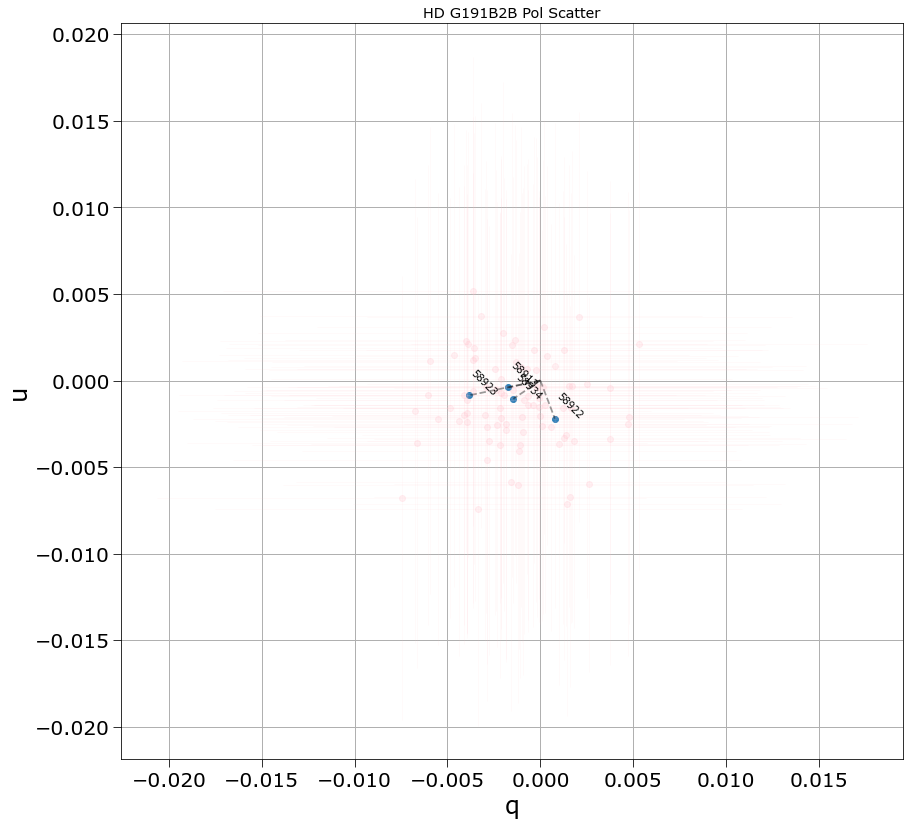

In [45]:
#funcs_utils.filter_data(zero_pol_data, ['G191B2B'])           
#It would return TOI stringss
        
funcs_polarimetry.q_n_u_single_plot_v1(filtered_data, 'pink', './img_out/HD '+['G191B2B'][0], True , True, True)

N obs: 15


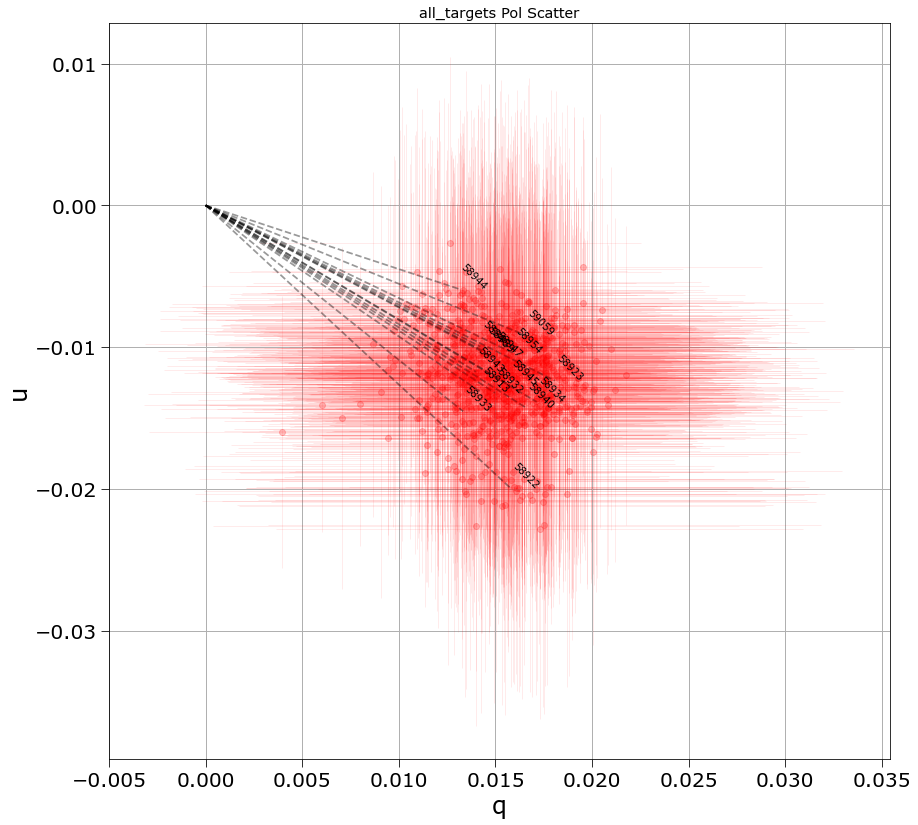

In [167]:
funcs_polarimetry.q_n_u_single_plot_v1(target_data, 'red', './img_out/all_targets', True , True, True)

N obs: 14


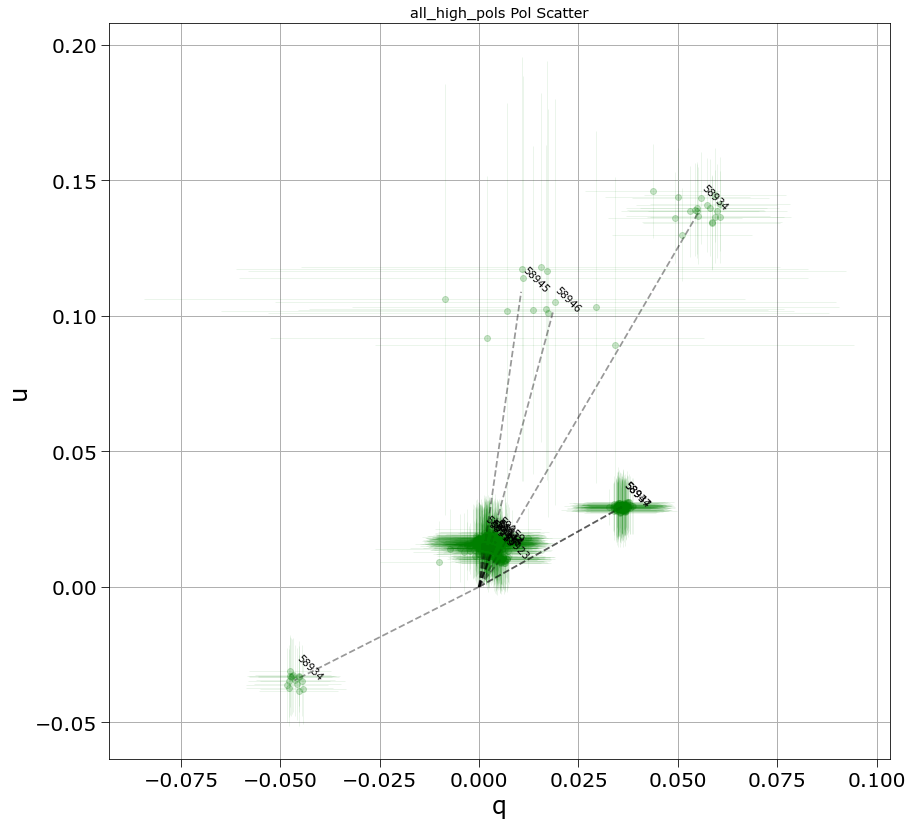

In [165]:
funcs_polarimetry.q_n_u_single_plot_v1(high_pol_data, 'green', './img_out/all_high_pols' ,True, True, True) #

N obs: 11


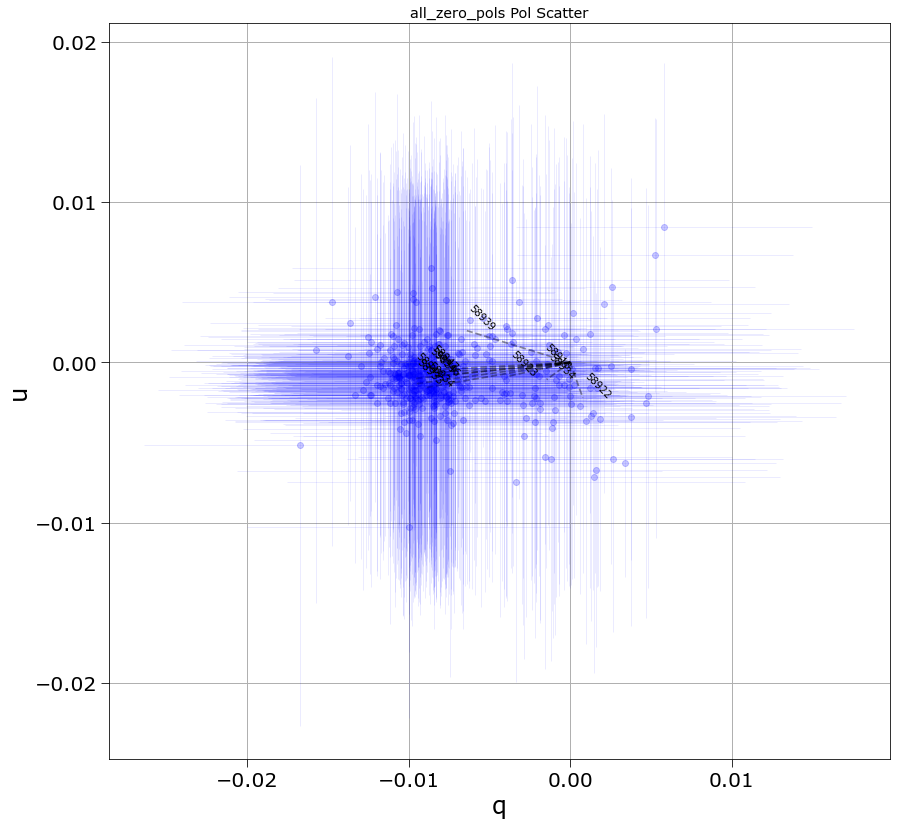

In [166]:
funcs_polarimetry.q_n_u_single_plot_v1(zero_pol_data[:], 'blue','./img_out/all_zero_pols', True, True ,True ) #

Length of pol data: 14
2020-03-05_hd215806
2020-03-14_HD215806
2020-03-15_HD215806
2020-03-26_oj287
2020-03-26_hd204827
2020-03-26_HD215806
2020-03-26_hd251204
2020-04-06_hd215806
2020-04-06_oj287
2020-04-07_hd215806
2020-04-07_oj287
2020-04-08_hd204827
2020-04-08_hd215806
2020-07-29_hd215806
Length of pol data: 11
2020-03-05_g191b2b
2020-03-14_G191B2B
2020-03-15_G191B2B
2020-03-25_hd212311
2020-03-26_g191b2b
2020-03-26_hd212311
2020-03-31_hd212311
2020-04-06_hd212311
2020-04-07_hd212311
2020-04-08_hd212311
2020-07-29_hd212311
Length of pol data: 15
2020-03-05_eecep
2020-03-14_EE Cep
2020-03-15_EE Cep
2020-03-24_eecep
2020-03-25_eecep
2020-03-26_eecep
2020-03-31_eecep
2020-04-01_EE_Cep
2020-04-04_EE Cep
2020-04-05_EE Cep
2020-04-06_eecep
2020-04-07_eecep
2020-04-08_eecep
2020-04-15_eecep
2020-07-29_eecep


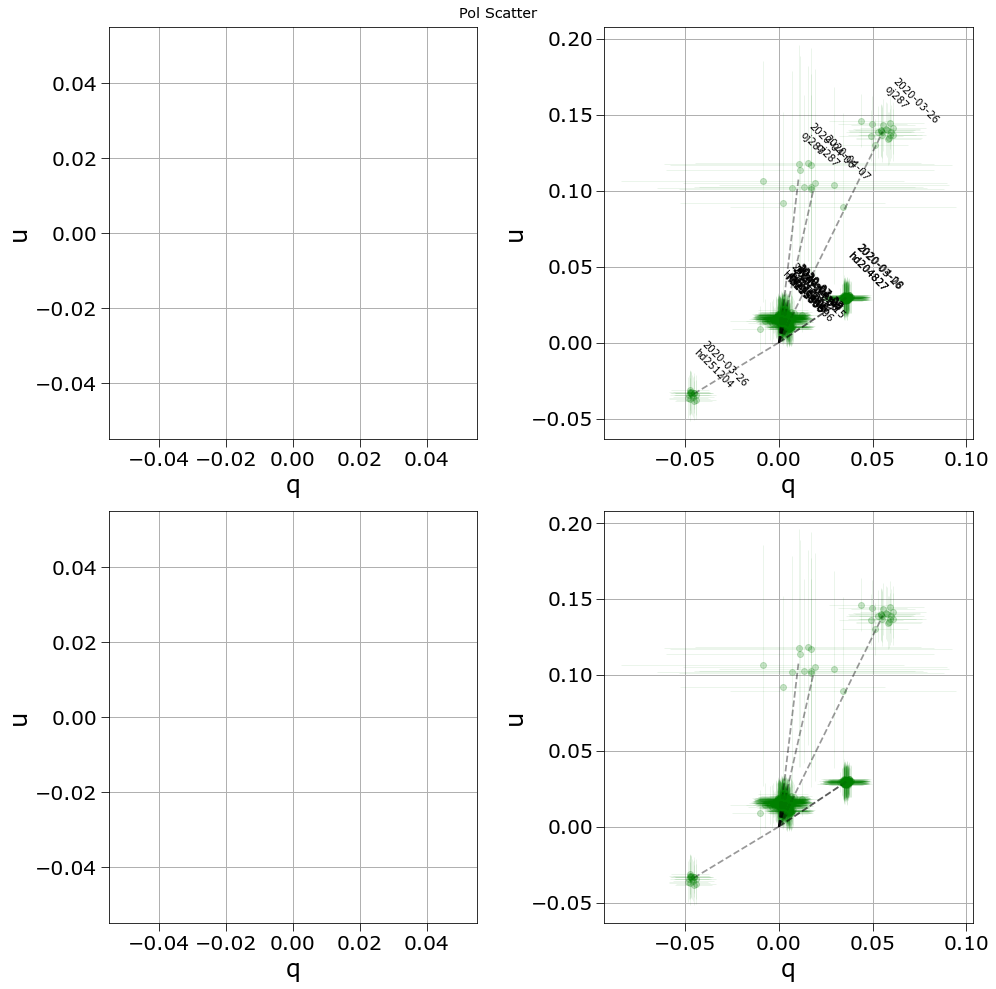

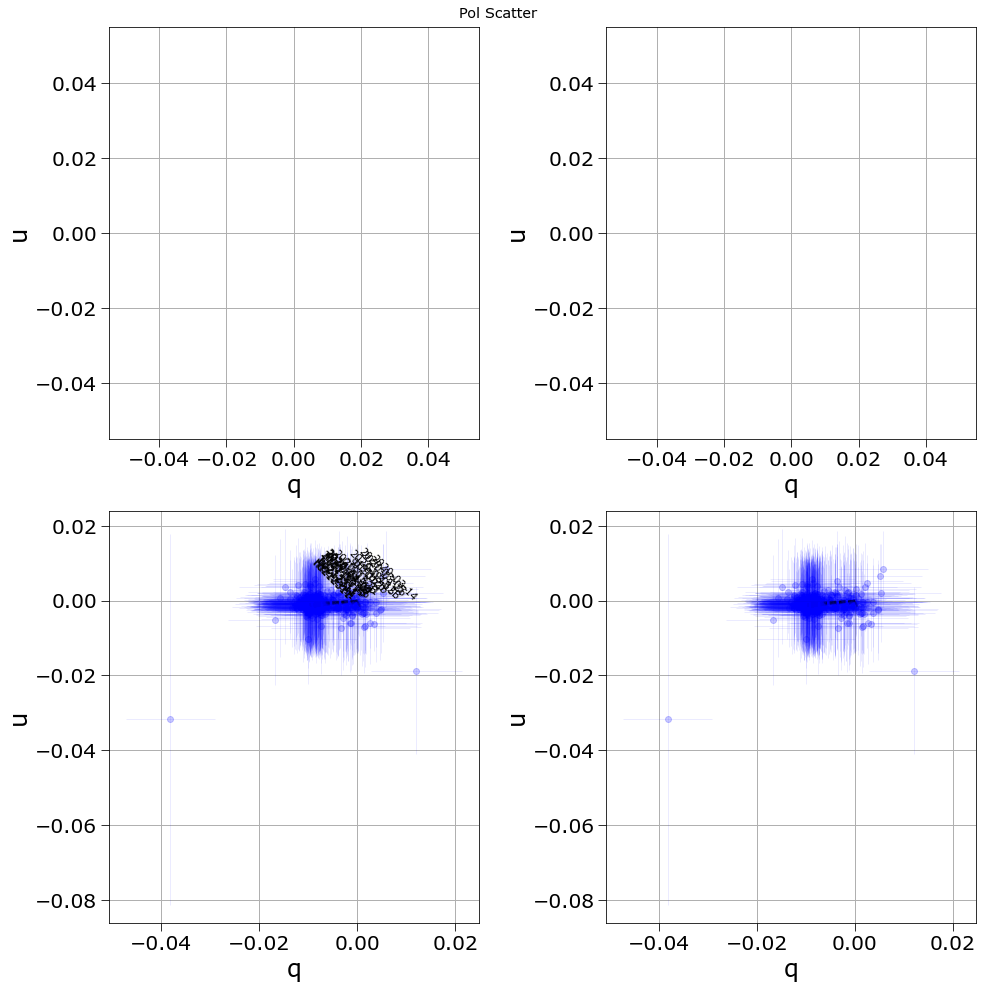

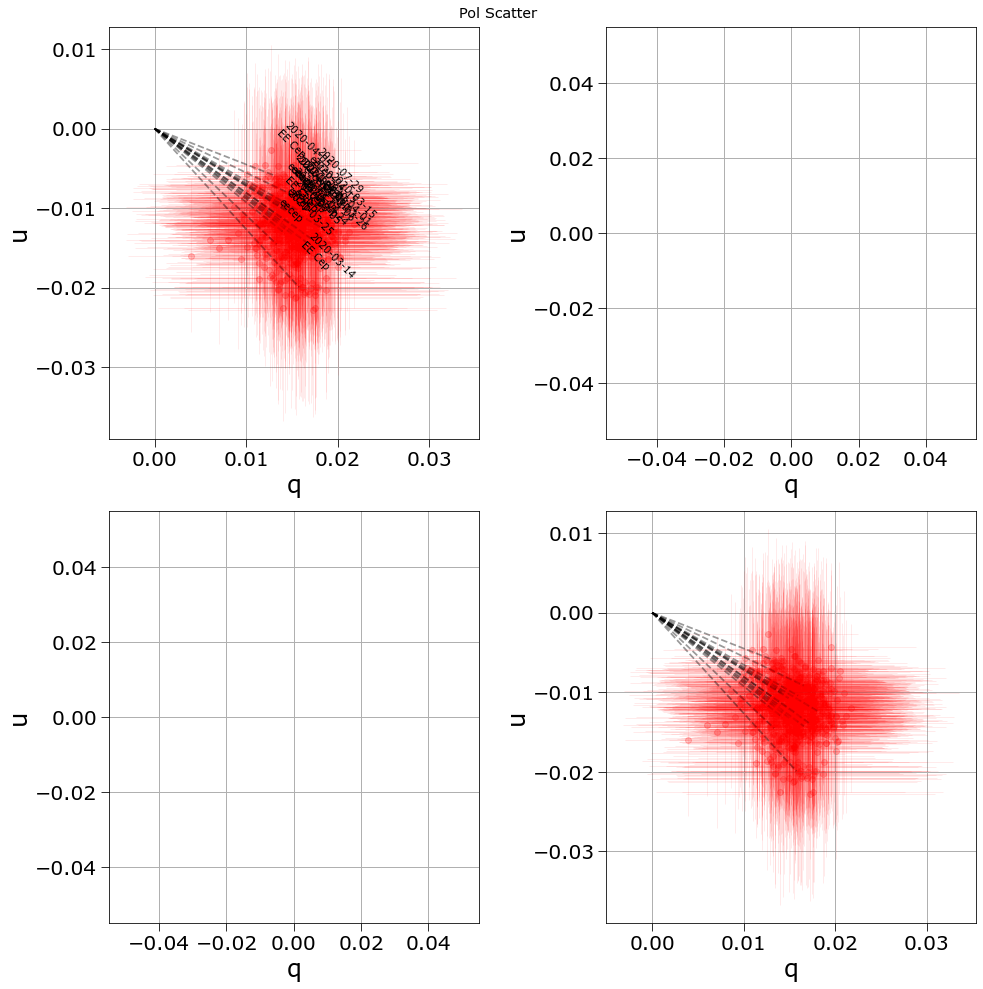

In [21]:
#use them as the same input
#Let me just see HD212311
#There is an outlier in there. Remove it please
funcs_polarimetry.q_n_u_stack_plot_v2(high_pol_data ,True, True, True ,True ) 
funcs_polarimetry.q_n_u_stack_plot_v2(zero_pol_data ,True, True, True ,True ) 
funcs_polarimetry.q_n_u_stack_plot_v2(target_data ,True, True, True ,True ) 

In [37]:
mater_list = target_data+zero_pol_data+high_pol_data
print(len(master_list))

In [ ]:
funcs_polarimetry.q_n_u_stack_plot_v2(mater_list ,'master_plot', True, True ,True ) 

Length of pol data: 52
2020-03-05_eecep
2020-03-14_EE Cep
2020-03-15_EE Cep
2020-03-24_eecep
2020-03-25_eecep
2020-03-26_eecep
2020-03-31_eecep
2020-04-01_EE_Cep
2020-04-04_EE Cep
2020-04-05_EE Cep
2020-04-06_eecep
2020-04-07_eecep
2020-04-08_eecep
2020-04-15_eecep
2020-04-16_eecep
2020-07-29_eecep
2020-03-05_g191b2b
2020-03-14_G191B2B
2020-03-15_G191B2B
2020-03-25_hd212311
2020-03-26_g191b2b
2020-03-26_hd212311
2020-03-31_hd212311
2020-04-06_hd212311
2020-04-07_hd212311
2020-04-08_hd212311
2020-04-15_hd212311
2020-04-16_g191b2b
2020-04-16_hd212311
2020-07-29_hd212311
2020-03-05_hd215806
2020-03-14_HD215806
2020-03-15_HD215806
2020-03-26_oj287
2020-03-26_hd204827
2020-03-26_HD215806
2020-03-26_hd251204
2020-04-06_hd215806
2020-04-06_oj287
2020-04-07_hd215806
2020-04-07_oj287
2020-04-08_hd204827
2020-04-08_hd215806
2020-04-15_hd204827
2020-04-15_hd215806
2020-04-15_oj287
2020-04-16_hd204827
2020-04-16_bd64106
2020-04-16_hd215806
2020-04-16_oj287
2020-04-18_OJ287
2020-07-29_hd215806


Length of pol data: 52
2020-03-05_eecep
2020-03-14_EE Cep
2020-03-15_EE Cep
2020-03-24_eecep
2020-03-25_eecep
2020-03-26_eecep
2020-03-31_eecep
2020-04-01_EE_Cep
2020-04-04_EE Cep
2020-04-05_EE Cep
2020-04-06_eecep
2020-04-07_eecep
2020-04-08_eecep
2020-04-15_eecep
2020-04-16_eecep
2020-07-29_eecep
2020-03-05_g191b2b
2020-03-14_G191B2B
2020-03-15_G191B2B
2020-03-25_hd212311
2020-03-26_g191b2b
2020-03-26_hd212311
2020-03-31_hd212311
2020-04-06_hd212311
2020-04-07_hd212311
2020-04-08_hd212311
2020-04-15_hd212311
2020-04-16_g191b2b
2020-04-16_hd212311
2020-07-29_hd212311
2020-03-05_hd215806
2020-03-14_HD215806
2020-03-15_HD215806
2020-03-26_oj287
2020-03-26_hd204827
2020-03-26_HD215806
2020-03-26_hd251204
2020-04-06_hd215806
2020-04-06_oj287
2020-04-07_hd215806
2020-04-07_oj287
2020-04-08_hd204827
2020-04-08_hd215806
2020-04-15_hd204827
2020-04-15_hd215806
2020-04-15_oj287
2020-04-16_hd204827
2020-04-16_bd64106
2020-04-16_hd215806
2020-04-16_oj287
2020-04-18_OJ287
2020-07-29_hd215806


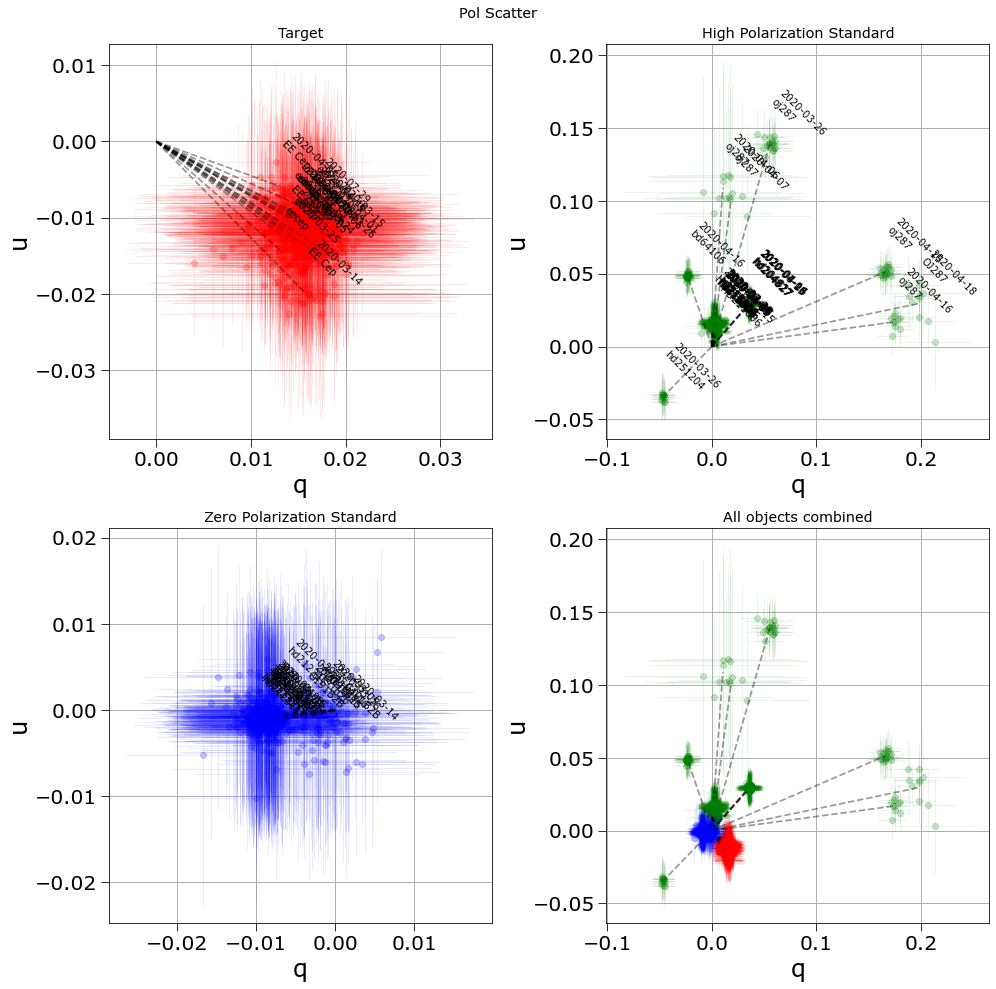

In [81]:
#There is an outlier in there. Remove it please
####################################2(pol_data, sv_im_str ,pol_deg, launch_verb, key_verb)
funcs_polarimetry.q_n_u_stack_plot_v2(mater_list ,'master_plot', True, True ,True ) 

Length of pol data: 28
2020-03-05_hd215806
2020-03-14_HD215806
2020-03-15_HD215806
2020-03-26_oj287
2020-03-26_hd204827
2020-03-26_HD215806
2020-03-26_hd251204
2020-07-29_hd215806
2020-03-05_g191b2b
2020-03-14_G191B2B
2020-03-15_G191B2B
2020-03-25_hd212311
2020-03-26_g191b2b
2020-03-26_hd212311
2020-03-31_hd212311
2020-07-29_hd212311
2020-03-05_eecep
2020-03-14_EE Cep
2020-03-15_EE Cep
2020-03-24_eecep
2020-03-25_eecep
2020-03-26_eecep
2020-03-31_eecep
2020-04-01_EE_Cep
2020-04-04_EE Cep
2020-04-05_EE Cep
2020-04-15_eecep
2020-07-29_eecep


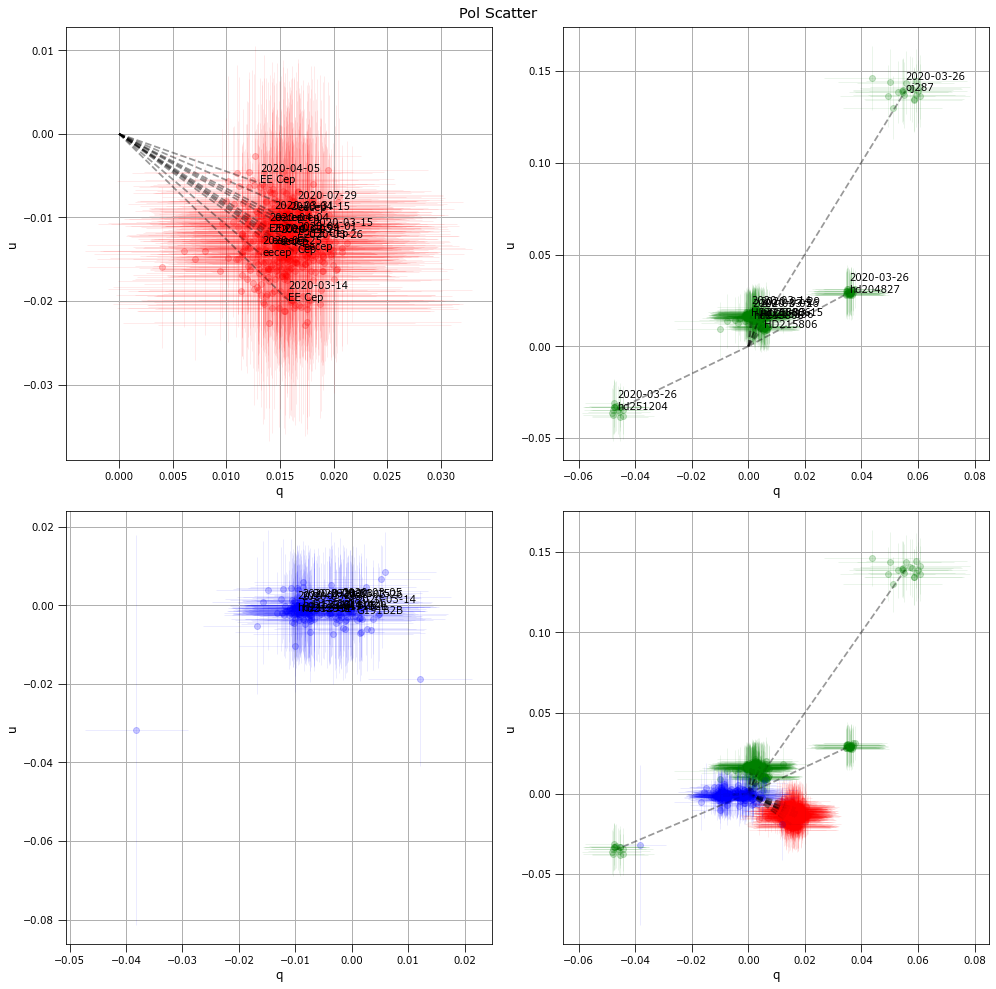

In [6]:
#From this we can conclude that OJ287 is... Highly Highly Polarized
funcs_polarimetry.q_n_u_stack_plot_v2([high_pol_std_03_05,
                                       high_pol_std_03_14,
                                       high_pol_std_03_15,
                                       high_pol_std_03_26,
                                       high_pol_std_03_26_02,
                                       high_pol_std_03_26_03,
                                       high_pol_std_03_26_04,
                                       high_pol_std_07_29,
                                       zero_pol_std_03_05,
                                       zero_pol_std_03_14,
                                       zero_pol_std_03_15,
                                       zero_pol_std_03_25,
                                       zero_pol_std_03_26,
                                       zero_pol_std_03_26_02,
                                       zero_pol_std_03_31,
                                       zero_pol_std_07_29,
                                       target_data_03_05,
                                       target_data_03_14,
                                       target_data_03_15,
                                       target_data_03_24,
                                       target_data_03_25,
                                       target_data_03_26,
                                       target_data_03_31,
                                       target_data_04_01,
                                       target_data_04_04,
                                       target_data_04_05,
                                       target_data_04_15,
                                       target_data_07_29,

                                        ] ,True, True, True ,True ) #Date only should be an option

Length of pol data: 19
2020-03-05_hd215806
2020-07-29_hd215806
2020-03-05_g191b2b
2020-03-14_G191B2B
2020-03-15_G191B2B
2020-03-25_hd212311
2020-03-26_g191b2b
2020-03-26_hd212311
2020-03-05_eecep
2020-03-14_EE Cep
2020-03-15_EE Cep
2020-03-24_eecep
2020-03-25_eecep
2020-03-26_eecep
2020-04-01_EE_Cep
2020-04-04_EE Cep
2020-04-05_EE Cep
2020-04-15_eecep
2020-07-29_eecep


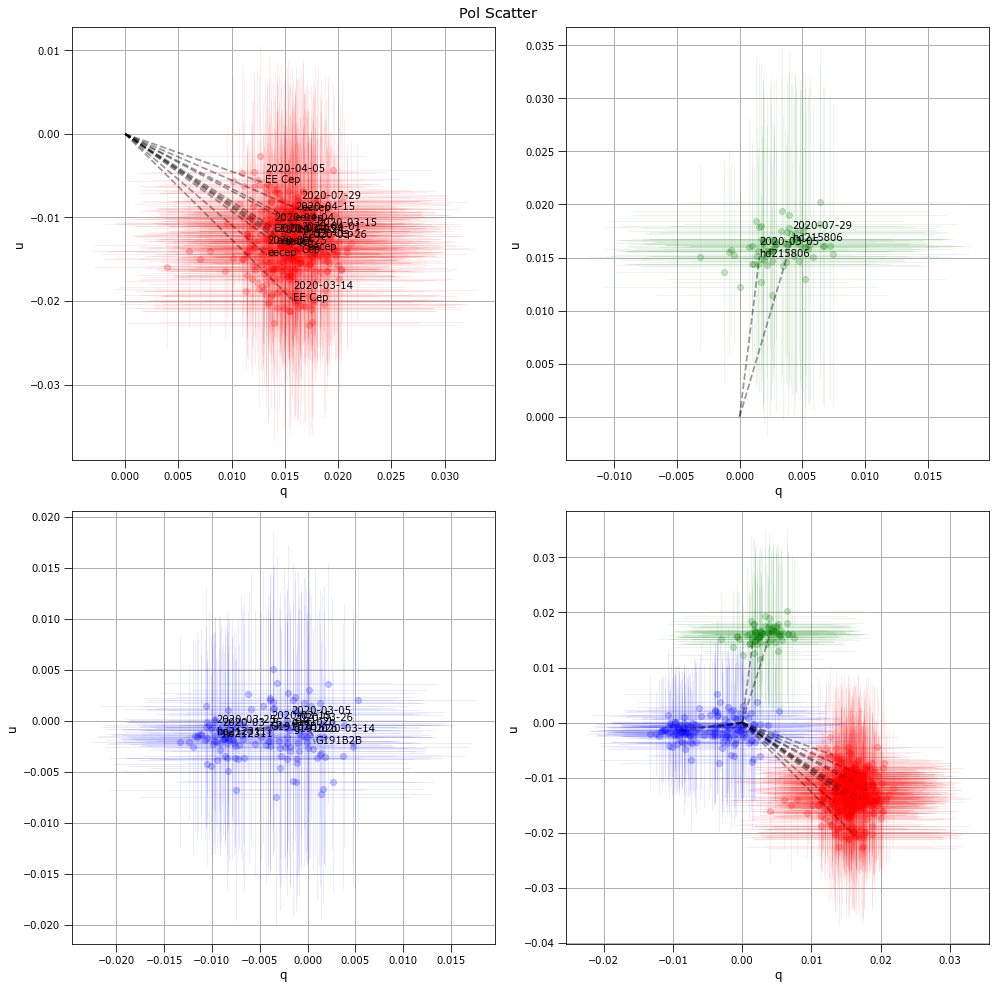

In [7]:
#Now for a test. send in data from multiple dates and prove that their q and u visualization tools can keep track of them
#Hold the MJDs and targets accountable 

#Do for multiple dates

#From this we can conclude that OJ287 is... Highly Highly Polarized
funcs_polarimetry.q_n_u_stack_plot_v2([high_pol_std_03_05,
                                       high_pol_std_07_29,
                                       zero_pol_std_03_05,
                                       zero_pol_std_03_14,
                                       zero_pol_std_03_15,
                                       zero_pol_std_03_25,
                                       zero_pol_std_03_26,
                                       zero_pol_std_03_26_02,
                                       target_data_03_05,
                                       target_data_03_14,
                                       target_data_03_15,
                                       target_data_03_24,
                                       target_data_03_25,
                                       target_data_03_26,
                                       target_data_04_01,
                                       target_data_04_04,
                                       target_data_04_05,
                                       target_data_04_15,
                                       target_data_07_29] ,True, True, True,True ) #Date only should be an option